In [1]:
%pip install -q pandas matplotlib numpy seaborn

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/School/UMGC Masters Data Analytics/DATA 645 MACHINE LEARNING/DATA645SCRIPTS/U2/DefaultCreditCardClients.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.drop(columns=['ID'], inplace=True)
df = df.rename(columns={'default payment next month': 'DEFAULT',
                        'PAY_0' : 'PAY_1'})
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
col_name = ['LIMIT_BAL','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
for col in col_name:
  df[col] = df[col] * .033 #convert into USD

In [6]:
stats = df.describe()
stats.to_csv('stats.csv')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,5526.982648,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,1427.677316,1330.276232,1282.768093,186.898156,195.398396,172.447490,159.260537,158.379792,172.111585,0.221200
std,4281.672832,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,2122.984252,2006.306140,1965.285549,546.588252,760.348723,581.029729,516.983272,504.184087,586.656371,0.415062
min,330.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-5610.000000,-2684.022000,-11206.899000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1650.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,76.782750,58.179000,41.448000,33.000000,27.489000,12.870000,9.768000,8.332500,3.885750,0.000000
50%,4620.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,628.716000,597.448500,563.343000,69.300000,66.297000,59.400000,49.500000,49.500000,49.500000,0.000000
75%,7920.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1798.698000,1656.286500,1623.542250,165.198000,165.000000,148.665000,132.437250,133.039500,132.000000,0.000000
max,33000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,29422.338000,30596.643000,31734.912000,28827.216000,55580.547000,29569.320000,20493.000000,14075.457000,17445.978000,1.000000


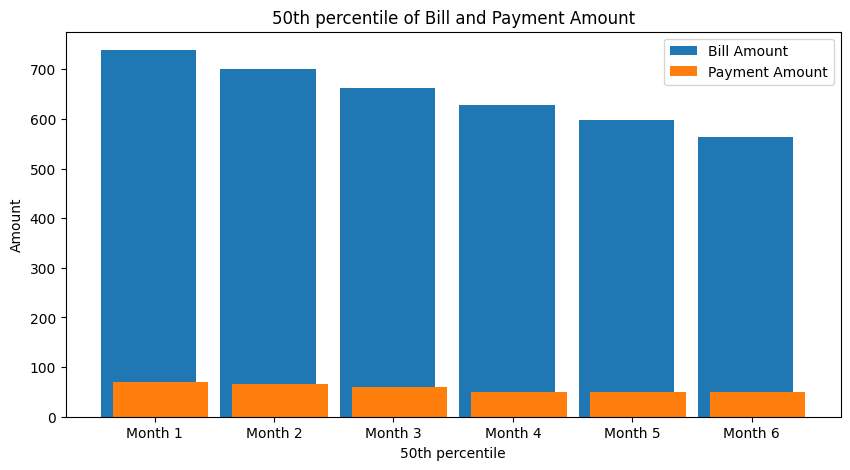

In [21]:
stats = df.describe()

bill_stats = stats.loc['50%', 'BILL_AMT1':'BILL_AMT6']
pay_stats = stats.loc['50%', 'PAY_AMT1':'PAY_AMT6']

w, x = .1, np.arange(len(bill_stats))
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.bar(x - w/2, bill_stats.values, label='Bill Amount')
ax.bar(x + w/2, pay_stats.values, label='Payment Amount')
ax.set_xticks(x, ["Month 1", "Month 2", "Month 3", "Month 4","Month 5", "Month 6"])
ax.set_xlabel('50th percentile')
ax.set_ylabel('Amount')
ax.set_title('50th percentile of Bill and Payment Amount')
ax.legend()
plt.show()

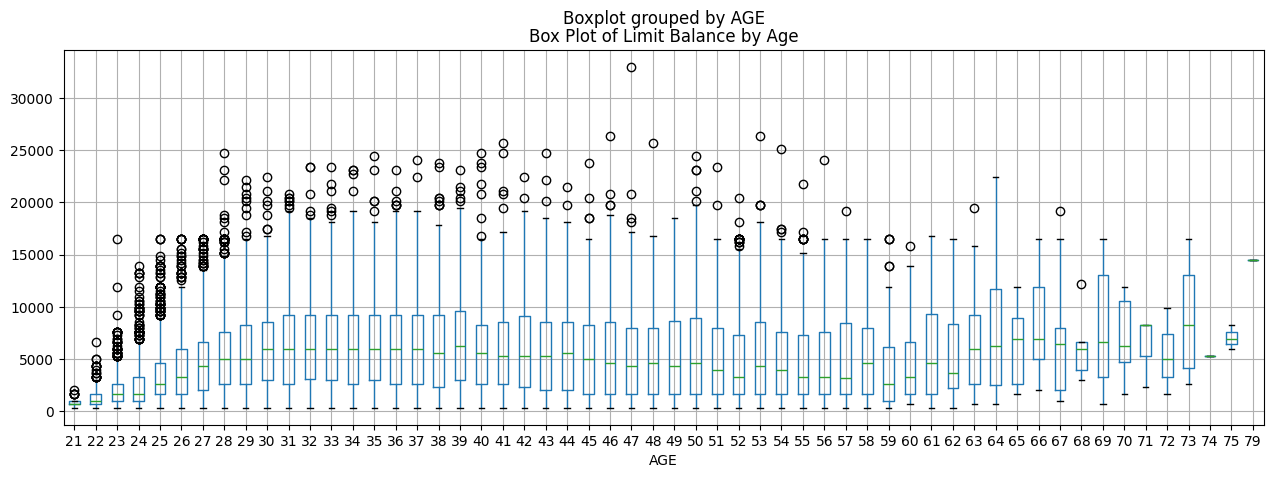

In [28]:
df.boxplot(column='LIMIT_BAL', by = "AGE", figsize=(15, 5))
plt.title('Box Plot of Limit Balance by Age')
plt.show()

In [7]:
df.loc[df['SEX'] == 1,'SEX'] = 0 # Standardize Male as 0
df.loc[df['SEX'] == 2, 'SEX'] = 1 # Standardize Female as 1
df.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,660.0,1,2,1,24,2,2,-1,-1,-2,...,0.000,0.000,0.000,0.000,22.737,0.0,0.0,0.000,0.000,1
1,3960.0,1,2,2,26,-1,2,0,0,0,...,107.976,114.015,107.613,0.000,33.000,33.0,33.0,0.000,66.000,1
2,2970.0,1,2,2,34,0,0,0,0,0,...,472.923,493.284,513.117,50.094,49.500,33.0,33.0,33.000,165.000,0
3,1650.0,1,2,1,37,0,0,0,0,0,...,934.362,955.647,975.051,66.000,66.627,39.6,36.3,35.277,33.000,0
4,1650.0,0,2,1,57,-1,0,-1,0,0,...,691.020,631.818,631.323,66.000,1210.473,330.0,297.0,22.737,22.407,0


In [8]:
df.loc[df['EDUCATION'] == 3, 'EDUCATION'] = 0 # Standardize Highschool as 0
df.loc[df['EDUCATION'] == 2, 'EDUCATION'] = 5 # Placeholder
df.loc[df['EDUCATION'] == 1, 'EDUCATION'] = 2 # Standardize Graduate as 2
df.loc[df['EDUCATION'] == 4, 'EDUCATION'] = 3 # Standardize Other as 3
df.loc[df['EDUCATION'] == 5, 'EDUCATION'] = 1 # Standardize University as 1
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,660.0,1,1,1,24,2,2,-1,-1,-2,...,0.000,0.000,0.000,0.000,22.737,0.0,0.0,0.000,0.000,1
1,3960.0,1,1,2,26,-1,2,0,0,0,...,107.976,114.015,107.613,0.000,33.000,33.0,33.0,0.000,66.000,1
2,2970.0,1,1,2,34,0,0,0,0,0,...,472.923,493.284,513.117,50.094,49.500,33.0,33.0,33.000,165.000,0
3,1650.0,1,1,1,37,0,0,0,0,0,...,934.362,955.647,975.051,66.000,66.627,39.6,36.3,35.277,33.000,0
4,1650.0,0,1,1,57,-1,0,-1,0,0,...,691.020,631.818,631.323,66.000,1210.473,330.0,297.0,22.737,22.407,0


In [9]:
df.loc[df['MARRIAGE'] == 2, 'MARRIAGE'] = 0 # Standardize Single as 0
df.loc[df['MARRIAGE'] == 3, 'MARRIAGE'] = 2 # Standardize  as Other as 2
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,660.0,1,1,1,24,2,2,-1,-1,-2,...,0.000,0.000,0.000,0.000,22.737,0.0,0.0,0.000,0.000,1
1,3960.0,1,1,0,26,-1,2,0,0,0,...,107.976,114.015,107.613,0.000,33.000,33.0,33.0,0.000,66.000,1
2,2970.0,1,1,0,34,0,0,0,0,0,...,472.923,493.284,513.117,50.094,49.500,33.0,33.0,33.000,165.000,0
3,1650.0,1,1,1,37,0,0,0,0,0,...,934.362,955.647,975.051,66.000,66.627,39.6,36.3,35.277,33.000,0
4,1650.0,0,1,1,57,-1,0,-1,0,0,...,691.020,631.818,631.323,66.000,1210.473,330.0,297.0,22.737,22.407,0


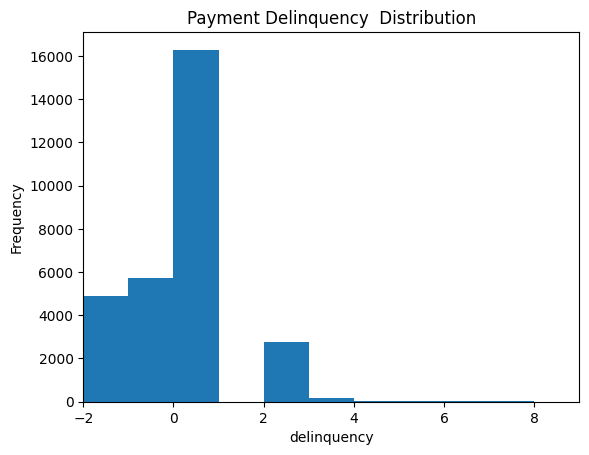

In [16]:
df['PAY_6'].plot(kind='hist',title="Payment Delinquency  Distribution",
                     xlim=(df['PAY_6'].min(), df['PAY_6'].max()+1),
                     xlabel='delinquency', ylabel='Frequency')
plt.show()

In [ ]:
col_names = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for col in col_names:
  df[col] = df[col].abs()
df.head()

In [ ]:
df['PAY_1'].plot(kind='hist',title="Payment Delinquency  Distribution",
                     xlim=(df['PAY_1'].min(), df['PAY_1'].max()+1),
                     xlabel='delinquency', ylabel='Frequency')
plt.show()


In [ ]:
male = df[df['SEX'] == 0]
female = df[df['SEX'] == 1]
male_percentage = male.shape[0]/df.shape[0]
female_percentage = female.shape[0]/df.shape[0]

In [ ]:
sex = ['Male', 'Female']
percentage = [male_percentage, female_percentage]
plt.bar(sex, percentage, color=['green'])
plt.title('SEX Distribution in Dataset')
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.show()

In [ ]:
df['AVG_BILL_AMT'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)
df['AVG_PAY_AMT'] = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].mean(axis=1)


In [ ]:
df['BILL_ZSCORE'] = (df['AVG_BILL_AMT'] - df['AVG_BILL_AMT'].mean()) / df['AVG_BILL_AMT'].std()
df['PAY_ZSCORE'] = (df['AVG_PAY_AMT'] - df['AVG_PAY_AMT'].mean()) / df['AVG_PAY_AMT'].std()
df = df[(df['BILL_ZSCORE'].abs() < 3) & (df['PAY_ZSCORE'].abs() < 3)]

In [ ]:
sns.scatterplot(data=df, x='AVG_BILL_AMT', y='AVG_PAY_AMT', hue='DEFAULT', palette='viridis')
plt.title('Average Bill Amount vs Averge Payment Amount')
plt.xlabel('Average Bill Amount')
plt.ylabel('Averge Payment Amount')
plt.show()

In [ ]:
df['AVG_BILL_AMT'].plot(kind='hist',title="Average Bill Amount Distribution",
                     xlim=(df['AVG_BILL_AMT'].min(), df['AVG_BILL_AMT'].max()+1),
                     xlabel='Average Bill Amount', ylabel='Frequency',
                     edgecolor='black', color='green', bins=50)
plt.show()

In [ ]:
sns.heatmap(df.corr())
plt.title('Correlation Heatmap')
plt.show()